In [1]:
#import urllib, urllib3
from bs4 import BeautifulSoup
import requests
import time
import io
import numpy as np
#import nltk
#from nltk.corpus import wordnet as wn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models.ldamodel import LdaModel

Downloading abstracts and from computer science papers using [arXiv.org](https://arxiv.org) API and group them by years:

In [2]:
start_time = time.time()
myfile = open("log-0.txt", "w")
myfile.close()

n_attempts = 500
max_articles_per_attempt = 50
for i in range(n_attempts):
    print("\r\t>>> Downloading {} chunk from {}:".format(i+1, n_attempts), end='')
    n_start = i*max_articles_per_attempt
    url = 'http://export.arxiv.org/api/query?search_query=cat:cs.LG&sortBy=submittedDate&sortOrder=descending&&start='+str(n_start)+'&max_results='+str(max_articles_per_attempt)
    url = requests.get(url).content
    soup = BeautifulSoup(url,"html.parser")
    with io.open('log-0.txt', 'a', encoding='utf8') as logfile:
        for tr in soup.find_all('id')[1:]:
            logfile.write(u" %s" % (tr.text.split("/")[4].split('v')[0]))
end_time = time.time()
print("\nRunning time is {}s".format(end_time-start_time))

with io.open('log-0.txt', 'r', encoding='utf8') as logfile:
    s = logfile.read().split('\n\n')[0].split()
    #print(s)
logfile.close()
print(len(s))

	>>> Downloading 500 chunk from 500:
Running time is 430.397980928421s
15338


In [3]:
s = list(set(s))

In [4]:
s[:5]

['1007.3799', '1605.00391', '1706.03492', '1306.1840', '1311.6809']

In [5]:
s1 = list(map(lambda x: x[0:2], s))
ml_papers = pd.DataFrame(columns=['Year', 'Papers'])
for i, item in enumerate(set(s1)):
    if s1.count(item) > 1:
        #print(item, s1.count(item))
        ml_papers.loc[i, 'Year'] = item
        ml_papers.loc[i, 'Papers'] = s1.count(item)
ml_papers.sort_values('Year', inplace=True)
ml_papers.reset_index(inplace=True, drop=True)
ml_papers['Year'] = ml_papers['Year'].astype(int) + 2000
ml_papers

,Year,Papers
0,2007,73
1,2008,131
2,2009,180
3,2010,332
4,2011,467
5,2012,1215
6,2013,1366
7,2014,1589
8,2015,2430
9,2016,3415


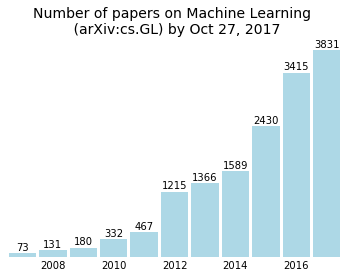

In [6]:
import matplotlib.pyplot as plt

plt.bar(ml_papers['Year'], ml_papers['Papers'], width=0.9, color='lightblue')
#plt.axis('off')
ax = plt.gca()
ax.set_title("Number of papers on Machine Learning \n (arXiv:cs.GL) by Oct 27, 2017", size=14)
ax.set_xlim(2006.5, 2017.5)

rects = ax.patches
labels = [ml_papers.loc[i, 'Papers'] for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 15, label, ha='center', va='bottom', color='black')

ax.tick_params(axis ='x', which='minor', length=0)
ax.tick_params(axis ='both', which='major', length=0)
ax.set_yticklabels = ['']
ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig("visual-1.pdf", format="pdf", transparent=True,rasterized=True,dpi=300)
plt.show()